In [3]:
pip install --upgrade pandas numpy scikit-learn matplotlib seaborn statsmodels

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/94/7a/4c00332a3ca79702bbc86228afd0e84e6f91b47222ec8cdf00677dd16481/numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.0 MB 653.6 kB/s eta 0:00:17
    --------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.0 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.

In [4]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\damia\Anaconda\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importar paquetes
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

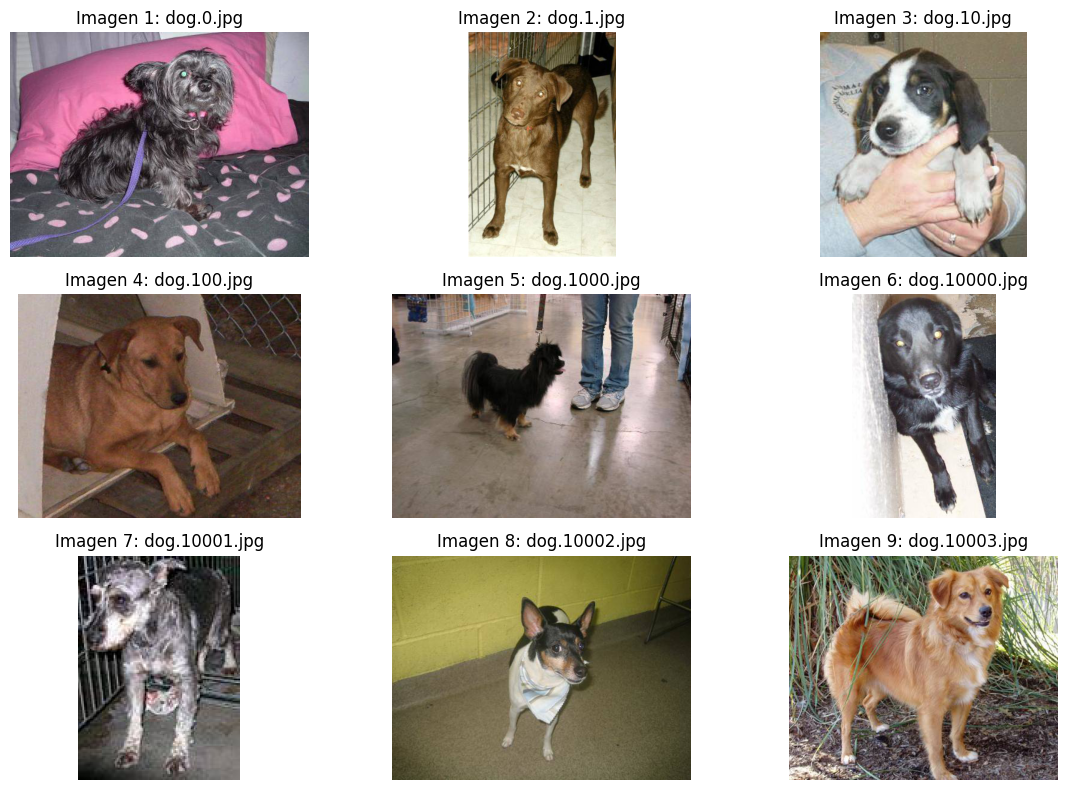

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta al directorio principal
data_dir = r"C:\Users\damia\Desktop\dogs-vs-cats\train\train"

# Función para filtrar los archivos que contienen "dog"
def filtrar_archivos_dog(directorio):
    archivos_dog = []
    for archivo in os.listdir(directorio):
        if "dog" in archivo.lower():
            archivos_dog.append(archivo)
    return archivos_dog

# Obtener la lista de archivos que contienen "dog"
archivos_con_dog = filtrar_archivos_dog(data_dir)

# Cargar y mostrar las primeras 9 imágenes
num_imagenes = 9
plt.figure(figsize=(12, 8))
for i, archivo in enumerate(archivos_con_dog[:num_imagenes]):
    ruta_imagen = os.path.join(data_dir, archivo)
    img = Image.open(ruta_imagen)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Imagen {i+1}: {archivo}")

plt.tight_layout()
plt.show()

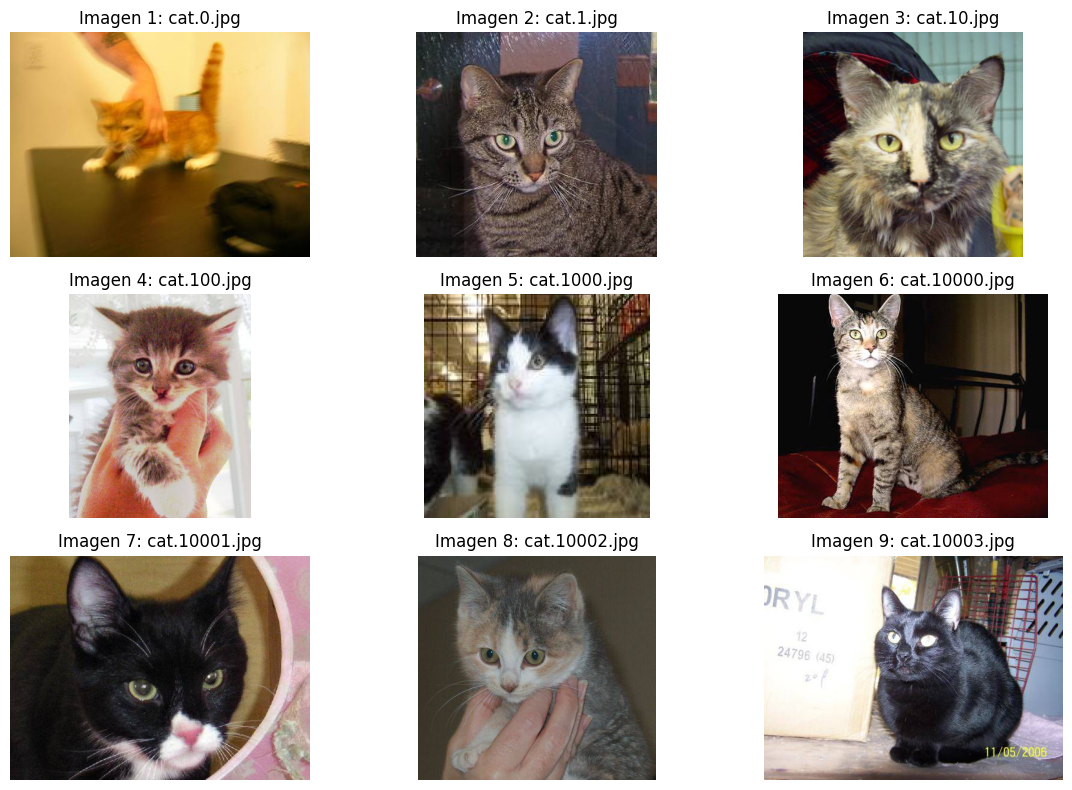

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta al directorio principal
data_dir = r"C:\Users\damia\Desktop\dogs-vs-cats\train\train"

# Función para filtrar los archivos que contienen "cat"
def filtrar_archivos_cat(directorio):
    archivos_cat = []
    for archivo in os.listdir(directorio):
        if "cat" in archivo.lower():
            archivos_cat.append(archivo)
    return archivos_cat

# Obtener la lista de archivos que contienen "cat"
archivos_con_cat = filtrar_archivos_cat(data_dir)

# Cargar y mostrar las primeras 9 imágenes
num_imagenes = 9
plt.figure(figsize=(12, 8))
for i, archivo in enumerate(archivos_con_cat[:num_imagenes]):
    ruta_imagen = os.path.join(data_dir, archivo)
    img = Image.open(ruta_imagen)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Imagen {i+1}: {archivo}")

plt.tight_layout()
plt.show()

CREAR CONJUNTO DE DATOS DE IMAGENES

<function matplotlib.pyplot.show(close=None, block=None)>

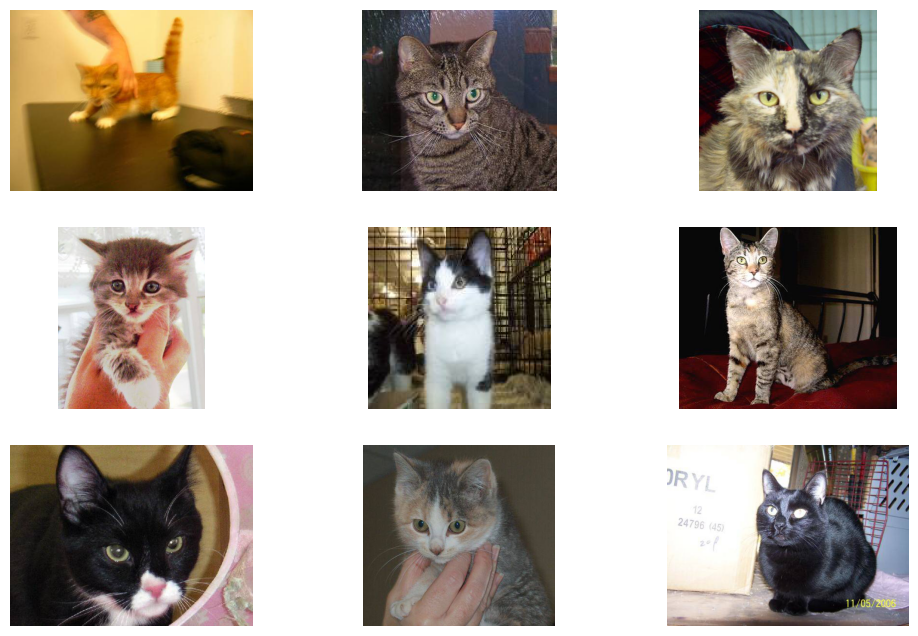

In [9]:
def load_cat_photos():
    cat_photos = []
    for filename in os.listdir(r"C:\Users\damia\Desktop\dogs-vs-cats\train\train"):
        if 'cat' in filename and filename.endswith('.jpg'):
            cat_photos.append(Image.open(os.path.join(r"C:\Users\damia\Desktop\dogs-vs-cats\train\train", filename)))
            if len(cat_photos) == 9:
                break
    return cat_photos

cat_photos = load_cat_photos()

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_photos[i])
    plt.axis('off')
    

plt.show

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = r"C:\Users\damia\Desktop\dogs-vs-cats"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test1"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [11]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1])

ENTRENAMIENTO DEL MODELO 

In [12]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

c:\Users\damia\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
import keras 

In [14]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [15]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

c:\Users\damia\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 5649s 7s/step - accuracy: 0.4972 - loss: 185.8809


GUARDAR MODELO 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("C:/Users/damia/Desktop/dogs-vs-cats/models/modelo.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

In [ ]:
# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

PREDICCIÓN DE IMAGENES

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")